In [1]:
!pip install -Uq watermark

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.3.7 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 2.1.3 which is incompatible.


In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import datetime as dt
from datetime import datetime

from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard


In [3]:
from google.colab import drive
drive.mount('/content/drive')
print("connected to my drive")

Mounted at /content/drive
connected to my drive


In [4]:
path2 = '/content/drive/MyDrive/latest_vaccination_data_tweets.csv'
df = pd.read_csv(path2)


In [ ]:
df

In [6]:
df= df[['date','total_cases','total_deaths','total_vaccinations','people_vaccinated','people_fully_vaccinated','Negative','Positive']]

In [ ]:
df

In [ ]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df

Text(0.5, 1.0, 'people_fully_vaccinated')

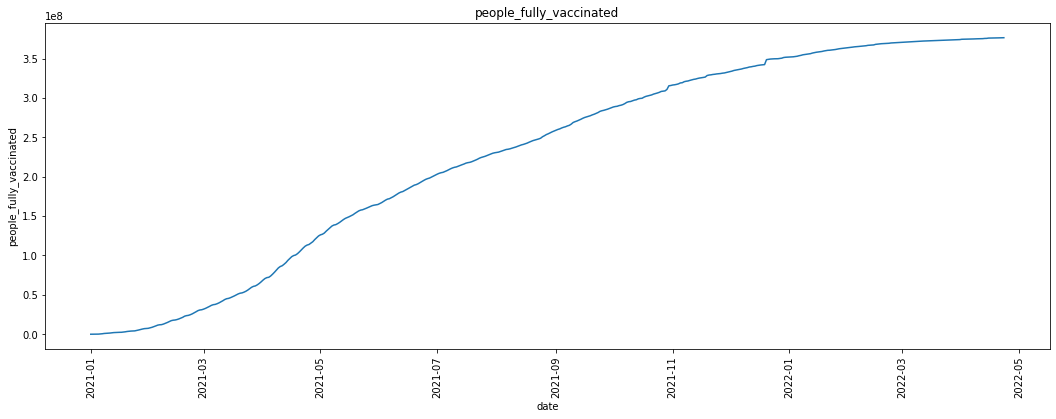

In [33]:
#Plot daily vaccinations as a function of date
plt.figure(figsize=(18,6))
sns.lineplot(data=df, x="date", y="people_fully_vaccinated")

plt.xticks(rotation=90)
plt.title("people_fully_vaccinated")

In [34]:
from datetime import datetime
train_test_split = datetime.strptime('2021-12-03', '%Y-%m-%d')
df_train = df.loc[df['date'] < train_test_split]
df_test = df.loc[df['date'] >= train_test_split]

In [36]:
# Importing Training Set
dataset_train = df_train
dataset_test=df_test

# Select features (columns) to be involved intro training and predictions
cols = list(dataset_train)[1:8]
cols_test = list(dataset_test)[1:8]

# Extract dates (will be used in visualization)
datelist_train = list(dataset_train['date'])
datelist_test = list(dataset_test['date'])

# datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]

print('Training set shape == {}'.format(dataset_train.shape))
print('All timestamps == {}'.format(len(datelist_train)))
print('Featured selected: {}'.format(cols))

print('Training set shape == {}'.format(dataset_test.shape))
print('All timestamps == {}'.format(len(datelist_test)))
print('Featured selected: {}'.format(cols_test))

Training set shape == (336, 8)
All timestamps == 336
Featured selected: ['total_cases', 'total_deaths', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'Negative', 'Positive']
Training set shape == (142, 8)
All timestamps == 142
Featured selected: ['total_cases', 'total_deaths', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'Negative', 'Positive']


In [37]:
cols

['total_cases',
 'total_deaths',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'Negative',
 'Positive']

In [38]:
cols = list(df_train)[1:8]
cols_test = list(df_test)[1:8]

In [15]:
cols

['total_cases',
 'total_deaths',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated']

In [16]:
cols_test

['total_cases',
 'total_deaths',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated']

In [39]:
dataset_test

,date,total_cases,total_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,Negative,Positive
336,2021-12-03,58642457.0,1176308.0,770464034.0,388703973.0,334836140.0,0.033,0.050
337,2021-12-04,58713446.0,1177021.0,772124960.0,389079598.0,335325500.0,0.018,0.019
338,2021-12-05,58776809.0,1177763.0,774232662.0,390243318.0,335837292.0,0.000,0.000
339,2021-12-06,58962044.0,1179386.0,776442627.0,390778187.0,336306068.0,0.092,0.181
340,2021-12-07,59080778.0,1181016.0,778699151.0,391282108.0,336721339.0,0.017,0.007
...,...,...,...,...,...,...,...,...
473,2022-04-19,95544347.0,1425176.0,976943068.0,427275424.0,376127683.0,0.125,0.000
474,2022-04-20,95634436.0,1426305.0,978498233.0,427361419.0,376188792.0,0.081,0.000
475,2022-04-21,95709192.0,1426802.0,979792525.0,427481556.0,376283883.0,0.030,0.149
476,2022-04-22,95819697.0,1427496.0,981095387.0,427612279.0,376361456.0,0.071,0.046


In [40]:
dataset_train

,date,total_cases,total_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,Negative,Positive
0,2021-01-01,23383084.0,514929.0,5904555.0,5761692.0,49683.0,0.092,0.029
1,2021-01-02,23671140.0,517989.0,6173699.0,6022797.0,52651.0,0.087,0.049
2,2021-01-03,23892824.0,519994.0,6320646.0,6162808.0,55157.0,0.018,0.055
3,2021-01-04,24103350.0,522886.0,7023101.0,6807528.0,100256.0,0.096,0.044
4,2021-01-05,24362273.0,527818.0,7880377.0,7564863.0,187914.0,0.023,0.028
...,...,...,...,...,...,...,...,...
331,2021-11-28,57859672.0,1163714.0,755545229.0,384578101.0,331670817.0,0.036,0.014
332,2021-11-29,58053538.0,1165836.0,757744684.0,385565860.0,332248341.0,0.041,0.058
333,2021-11-30,58176072.0,1167557.0,760173856.0,386256929.0,332796920.0,0.072,0.080
334,2021-12-01,58325930.0,1170195.0,763132762.0,387191999.0,333468263.0,0.075,0.036


In [ ]:
#for training
dataset_train = dataset_train[cols].astype(str)
dataset_test=dataset_test[cols_test].astype(str)
for i in cols:
    for j in range(2, len(dataset_train)):
        dataset_train[i][j] = dataset_train[i][j].replace(',', '')

for k in cols_test:
    for l in range(336, len(cols_test)):
        dataset_test[k][l] = dataset_test[k][l].replace(',', '')
        
dataset_train = dataset_train.astype(float)
dataset_test = dataset_test.astype(float)

# Using multiple features (predictors)
training_set = dataset_train.to_numpy()
testing_set = dataset_test.to_numpy()

print('Shape of training set == {}.'.format(training_set.shape))
training_set

print('Shape of testing set == {}.'.format(testing_set.shape))
testing_set

In [42]:
df_for_training = df_train[cols].astype(float)
df_for_testing = df_test[cols].astype(float)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)

sc_predict = StandardScaler()
sc_predict.fit_transform(training_set[:, 0:1])

In [ ]:
# Feature Scaling for testing data
from sklearn.preprocessing import StandardScaler

sc1 = StandardScaler()
testing_set_scaled = sc.fit_transform(testing_set)

sc_predict1 = StandardScaler()
sc_predict1.fit_transform(testing_set[:, 0:1])

In [23]:
# from sklearn.preprocessing import MinMaxScaler
# cpu_list = [i for i in df.columns if i != 'date']
# scaler = MinMaxScaler()
# scaled_train = scaler.fit_transform(df_train[cpu_list])
# scaled_test = scaler.transform(df_test[cpu_list])

In [45]:
# Creating a data structure with 90 timestamps and 1 output training
X_train = []
y_train = []

n_future= 15  # Number of days we want top predict into the future
n_past = 100 # Number of past days we want to use to predict the future

for i in range(n_past, len(df_train) - n_future +1):
    X_train.append(training_set_scaled[i - n_past:i, 0:df_train.shape[1] - 1])
    y_train.append(training_set_scaled[i + n_future - 1:i + n_future, 0])
    # X_test.append(testing_set_scaled[i - n_past:i, 0:df.shape[1] - 1])
    # y_test.append(testing_set_scaled[i + n_future - 1:i + n_future, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

X_train shape == (222, 100, 7).
y_train shape == (222, 1).


In [46]:
#testing
X_test = []
y_test = []

n_future1 = 15  # Number of days we want top predict into the future
n_past1 = 100 # Number of past days we want to use to predict the future

for i in range(n_past1, len(df_test) - n_future1 +1):
    X_test.append(testing_set_scaled[i - n_past1:i, 0:df.shape[1] - 1])
    y_test.append(testing_set_scaled[i + n_future1 - 1:i + n_future1, 0])
X_test, y_test = np.array(X_test), np.array(y_test)


print('X_test shape == {}.'.format(X_test.shape))
print('y_test shape == {}.'.format(y_test.shape))

X_test shape == (28, 100, 7).
y_test shape == (28, 1).


In [47]:
# Import Libraries and packages from Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard


In [48]:
from keras.layers import Bidirectional
 

In [28]:
# def create_model():
#     model = Sequential()
#     model.add(LSTM(50,kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01), input_shape=(X_train.shape[1], X_train.shape[2])))
#     # model.add(Conv1D(32, kernel_size=3, activation='relu'))
#     # model.add(Bidirectional(LSTM(32, return_sequences=False)))
#     model.add(Dropout(0.85))
#     model.add(Dense(1))
#     model.compile(loss='mean_squared_error', optimizer='adam')
#     return model


# # def create_model(x,y):
#     # define LSTM
#     model = Sequential()
#     model.add(Bidirectional(LSTM(20, return_sequences=True), input_shape=(x,y)))
#     model.add(TimeDistributed(Dense(1, activation='sigmoid')))
#     model.compile(loss='mean_squared_error', optimizer='adam')
#     return model 

In [196]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, TimeDistributed, Conv1D, MaxPooling1D, Flatten, Bidirectional, Input, Flatten, Activation, Reshape, RepeatVector, Concatenate
from tensorflow.keras.models import Model

In [666]:
# Initializing the Neural Network based on LSTM
model = Sequential()

# Adding 1st LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape = (X_train.shape[1], X_train.shape[2])))

# Adding 2nd LSTM layer
model.add(LSTM(units=10, return_sequences=False))

# Adding Dropout
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1, activation='linear'))

# Compiling the Neural Network
model.compile(optimizer = Adam(learning_rate=1e-5), loss='mean_squared_error')

In [667]:
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')
history = model.fit(X_train, y_train, shuffle=True, epochs=50, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1, batch_size=8)


Epoch 1/50
23/23 [==============================] - ETA: 0s - loss: 0.3882
Epoch 1: val_loss improved from inf to 2.62435, saving model to weights.h5
23/23 [==============================] - 7s 105ms/step - loss: 0.3882 - val_loss: 2.6243 - lr: 1.0000e-05
Epoch 2/50
23/23 [==============================] - ETA: 0s - loss: 0.4037
Epoch 2: val_loss improved from 2.62435 to 2.54845, saving model to weights.h5
23/23 [==============================] - 2s 67ms/step - loss: 0.4037 - val_loss: 2.5484 - lr: 1.0000e-05
Epoch 3/50
23/23 [==============================] - ETA: 0s - loss: 0.3966
Epoch 3: val_loss improved from 2.54845 to 2.47740, saving model to weights.h5
23/23 [==============================] - 2s 67ms/step - loss: 0.3966 - val_loss: 2.4774 - lr: 1.0000e-05
Epoch 4/50
23/23 [==============================] - ETA: 0s - loss: 0.3822
Epoch 4: val_loss improved from 2.47740 to 2.40364, saving model to weights.h5
23/23 [==============================] - 2s 67ms/step - loss: 0.3822 - v

In [668]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_50 (LSTM)              (None, 100, 50)           11600     
                                                                 
 lstm_51 (LSTM)              (None, 10)                2440      
                                                                 
 dropout_25 (Dropout)        (None, 10)                0         
                                                                 
 dense_25 (Dense)            (None, 1)                 11        
                                                                 
Total params: 14,051
Trainable params: 14,051
Non-trainable params: 0
_________________________________________________________________


In [669]:
model.evaluate(X_train, y_train)

7/7 [==============================] - 0s 19ms/step - loss: 0.1120


0.11202666163444519

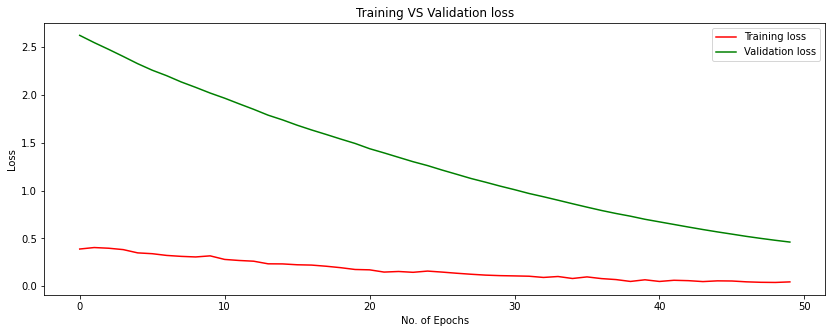

In [670]:
plt.plot(history.history['loss'], 'r', label='Training loss')
plt.plot(history.history['val_loss'], 'g', label='Validation loss')
plt.title('Training VS Validation loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [671]:
# Extract dates (will be used in visualization)
datelist_train = list(df_train['date'])


In [672]:
# Generate list of sequence of days for predictions
datelist_future = pd.date_range(datelist_train[-1], periods=n_future, freq='1d').tolist()


# Convert Pandas Timestamp to Datetime object (for transformation) --> FUTURE
datelist_future_ = []
for this_timestamp in datelist_future:
    datelist_future_.append(this_timestamp.date())

In [673]:
# Perform predictions
predictions_future = model.predict(X_train[-n_future:])

predictions_train = model.predict(X_train[n_past:])

In [674]:
from datetime import datetime

In [675]:
# Inverse the predictions to original measurements

# ---> Special function: convert <datetime.date> to <Timestamp>
def datetime_to_timestamp(x):
    '''
        x : a given datetime value (datetime.date)
    '''
    return datetime.strptime(x.strftime('%Y%m%d'), '%Y%m%d')
 


y_pred_future = sc_predict.inverse_transform(predictions_future)
y_pred_train = sc_predict.inverse_transform(predictions_train)
y_pred_train
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['sum_of_people_fully_vaccinated']).set_index(pd.Series(datelist_future))
PREDICTION_TRAIN = pd.DataFrame(y_pred_train, columns=['sum_of_people_fully_vaccinated']).set_index(pd.Series(datelist_train[2 * n_past + n_future -1:]))

# Convert <datetime.date> to <Timestamp> for PREDCITION_TRAIN
PREDICTION_TRAIN.index = PREDICTION_TRAIN.index.to_series().apply(datetime_to_timestamp)

PREDICTION_TRAIN

,sum_of_people_fully_vaccinated
2021-08-03,43399404.0
2021-08-04,43632736.0
2021-08-05,43737128.0
2021-08-06,43763796.0
2021-08-07,43725240.0
...,...
2021-11-28,50414640.0
2021-11-29,50510260.0
2021-11-30,50408664.0
2021-12-01,50373100.0


In [676]:
df_google = pd.DataFrame(df)

In [677]:
df_google.date = pd.to_datetime(df_google.date)

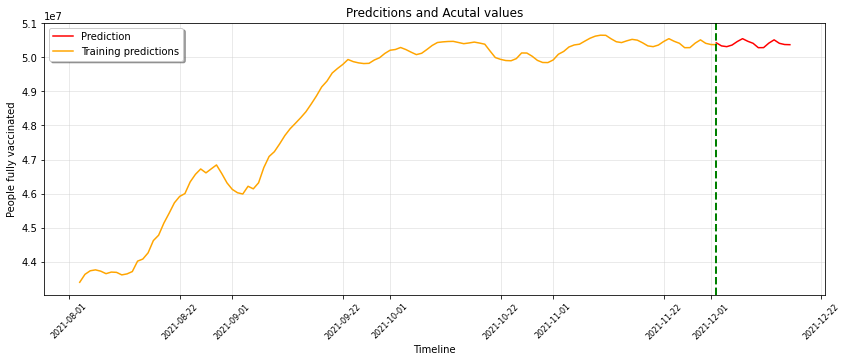

In [678]:
# Set plot size 
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5

# Plot parameters
START_DATE_FOR_PLOTTING = '2021-1-01'

plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['sum_of_people_fully_vaccinated'], color='r', label='Prediction')
plt.plot(PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:].index, PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:]['sum_of_people_fully_vaccinated'], color='orange', label='Training predictions')
# plt.plot(df.loc[START_DATE_FOR_PLOTTING:].index, df.loc[START_DATE_FOR_PLOTTING:]['sum_of_people_fully_vaccinated'], color='b', label='Actual vaccinated')

plt.axvline(x = min(PREDICTIONS_FUTURE.index), color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title('Predcitions and Acutal values', family='Arial', fontsize=12)
plt.xlabel('Timeline', family='Arial', fontsize=10)
plt.ylabel('People fully vaccinated', family='Arial', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

In [679]:
X_train.shape

(222, 100, 7)

In [680]:
predictions_train.shape

(122, 1)

In [681]:
# check model with test data
prediction= model.predict(X_test)
print("prediction\n", prediction)
print("\nPrediction Shape-",prediction.shape)

prediction
 [[0.77474004]
 [0.7808328 ]
 [0.7858634 ]
 [0.80864   ]
 [0.81517124]
 [0.82679933]
 [0.8362916 ]
 [0.84397507]
 [0.8520937 ]
 [0.8667368 ]
 [0.8746366 ]
 [0.8783371 ]
 [0.87949383]
 [0.8873835 ]
 [0.88001645]
 [0.86650366]
 [0.86439955]
 [0.8688343 ]
 [0.87429273]
 [0.87766045]
 [0.87824875]
 [0.8847112 ]
 [0.89381963]
 [0.9046596 ]
 [0.9148444 ]
 [0.90502197]
 [0.88973945]
 [0.8762408 ]]

Prediction Shape- (28, 1)


In [682]:
prediction_copies_array = np.repeat(prediction,7, axis=-1)

In [683]:
pred=sc.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),7)))[:,0]

In [684]:
X_test.shape

(28, 100, 7)

In [685]:
y_test.shape

(28, 1)

In [686]:
original_copies_array = np.repeat(y_test,7, axis=-1)
original=sc.inverse_transform(np.reshape(original_copies_array,(len(X_test),7)))[:,0]

In [687]:
original.shape

(28,)

In [688]:
from sklearn.metrics import mean_squared_error

In [689]:
import sklearn

In [690]:
import math
from numpy import sqrt 
mse = sklearn.metrics.mean_squared_error(original, pred)

In [691]:
mse

107734566379.25

In [692]:
rms = sqrt(mean_squared_error(original, pred))

In [693]:
rms

328229.44167038094

In [694]:
rmspe = np.sqrt(np.mean(np.square(((y_test - original) / y_test)), axis=0))

In [695]:
print("Pred Values-- " ,pred)
print("\nOriginal Values-- " ,original)

Pred Values--  [93738776. 93821144. 93889152. 94197072. 94285368. 94442568. 94570896.
 94674768. 94784528. 94982488. 95089280. 95139312. 95154952. 95261608.
 95162016. 94979336. 94950888. 95010840. 95084632. 95130160. 95138120.
 95225480. 95348616. 95495168. 95632856. 95500064. 95293456. 95110968.]

Original Values--  [94413510. 94461292. 94502405. 94559274. 94622603. 94674737. 94698786.
 94709231. 94741481. 94785041. 94850311. 94938649. 95021384. 95054956.
 95066921. 95108609. 95151256. 95274010. 95345322. 95374618. 95406235.
 95417545. 95492682. 95544347. 95634436. 95709192. 95819697. 95849087.]


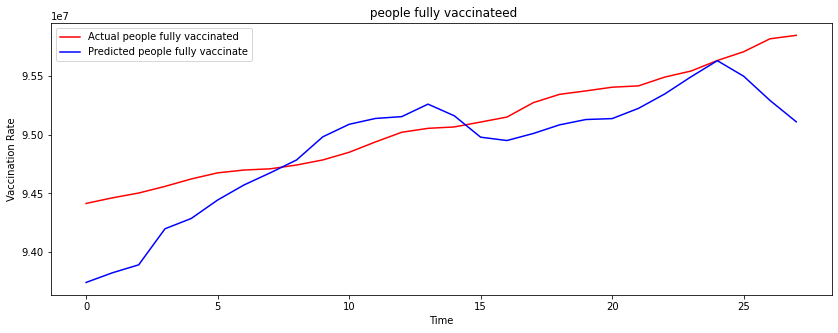

In [696]:
# Finally, draw a graph to compare our PRED with the original data.

plt.plot(original, color = 'red', label = 'Actual people fully vaccinated')
plt.plot(pred, color = 'blue', label = 'Predicted people fully vaccinate')
plt.title(' people fully vaccinateed')
plt.xlabel('Time')
plt.ylabel('Vaccination Rate')
plt.legend()
plt.show()

In [697]:
mape = np.mean(np.abs((original - pred) / np.abs(original)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))

Mean Absolute Percentage Error (MAPE): 0.28


In [698]:
df.describe()

,total_cases,total_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,Negative,Positive
count,4.780000e+02,4.780000e+02,4.780000e+02,4.780000e+02,4.780000e+02,478.000000,478.000000
mean,5.381863e+07,1.016685e+06,5.413698e+08,2.779881e+08,2.276991e+08,0.054540,0.045111
std,2.187990e+07,2.429786e+05,3.071146e+08,1.352733e+08,1.274438e+08,0.027308,0.036979
min,2.338308e+07,5.149290e+05,5.904555e+06,5.761692e+06,4.968300e+04,0.000000,0.000000
25%,3.768232e+07,8.451978e+05,3.004694e+08,1.820270e+08,1.251322e+08,0.039250,0.024000
50%,4.671314e+07,9.680935e+05,5.639401e+08,3.190270e+08,2.539696e+08,0.052000,0.039000
75%,6.209575e+07,1.211018e+06,8.273505e+08,4.027539e+08,3.496407e+08,0.068000,0.060750
max,9.584909e+07,1.427710e+06,9.814403e+08,4.276520e+08,3.763974e+08,0.161000,0.369000
